In [1]:
%load_ext autoreload
%autoreload 2
import dotenv
dotenv.load_dotenv()

False

In [2]:
import glob
import imageio
from matplotlib import pyplot as plt
import numpy as np
from tqdm.auto import tqdm

In [36]:
import skimage.filters
from dataclasses import dataclass
from operations import Operation

@dataclass
class Threshold(Operation):
    debug: bool = False
    def process(self, folder, depth):
        histogram, bins = np.histogram(depth, bins=100, range=[0, 1200], density=True)
        histogram[0] = histogram[-1] = 0
        threshold = skimage.filters.threshold_otsu(hist=histogram)
        threshold = bins[threshold]
        histogram, bins = np.histogram(depth, bins=100, range=[0, 1500], density=True)
        histogram[0] = histogram[-1] = 0
        self.display.axes[0].plot((bins[:-1] + bins[1:])/2, histogram)
        self.display.axes[0].plot([threshold, threshold], [0, np.max(histogram)])
        return np.clip(depth, 0, threshold)

dataset/ds325/gestures_two_hands


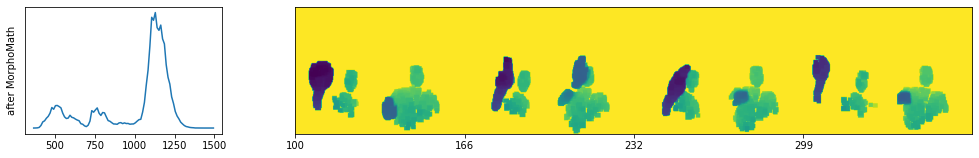

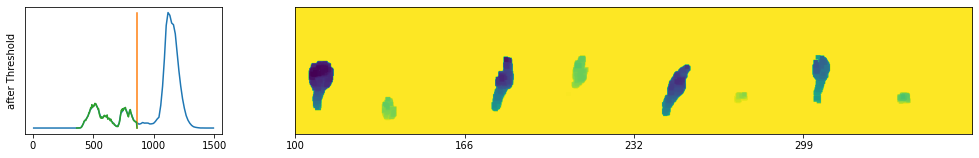

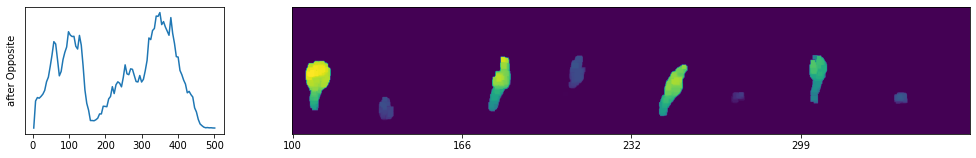

dataset/ds325/fast_circles


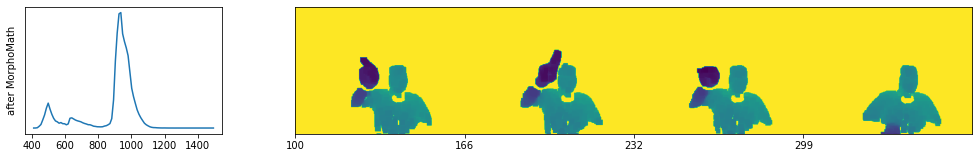

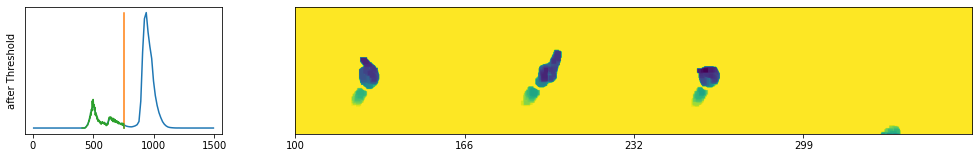

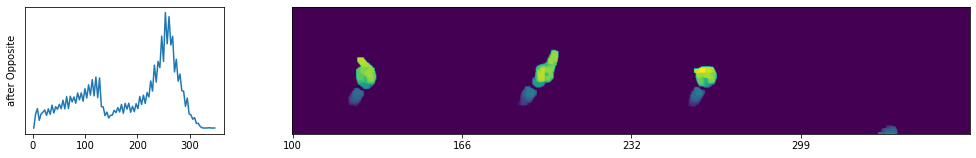

dataset/ds325/gestures_two_hands_swap


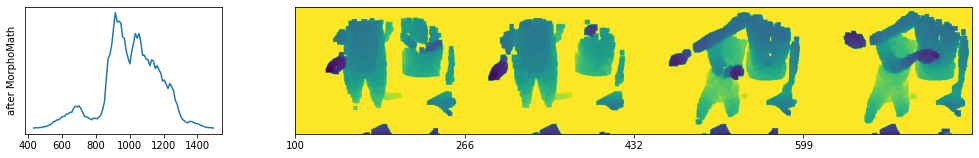

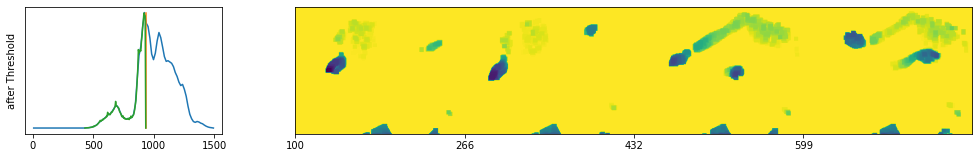

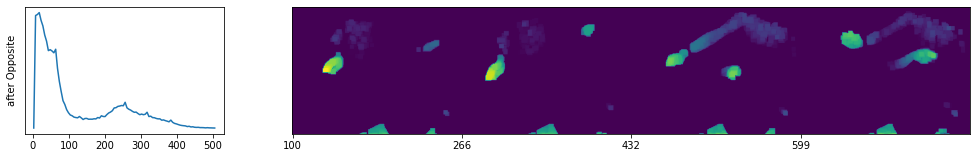

In [41]:
from operations import *
from stroke_detector import StrokeDetector

detector = StrokeDetector([
    Clipping(range=(100, 1500)),
    MorphoMath("closing", kwargs={"footprint": np.ones((8, 8))}, debug=True),
    Threshold(debug=True),
    Opposite(debug=True),
])

for folder in [
    "dataset/ds325/gestures_two_hands",
    "dataset/ds325/fast_circles",
    "dataset/ds325/gestures_two_hands_swap",
]:
    print(folder)
    output = detector(folder=folder)

  0%|          | 0/17 [00:00<?, ?it/s]

dataset/ds325/fast_circles


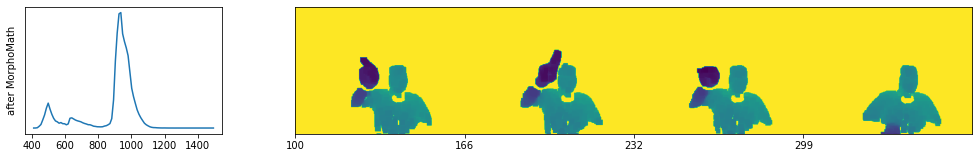

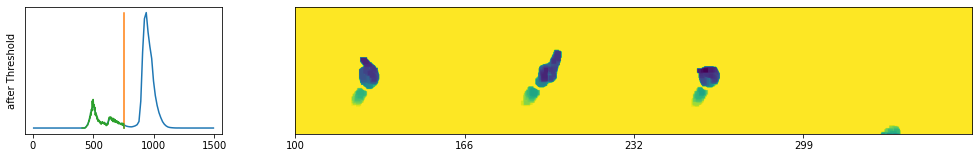

dataset/ds325/gestures_two_hands


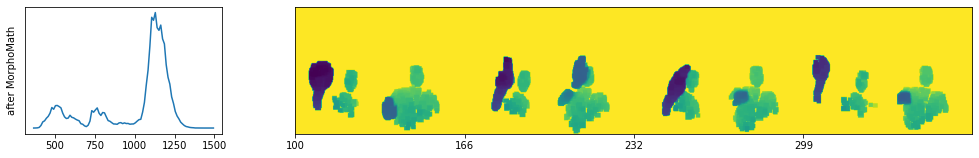

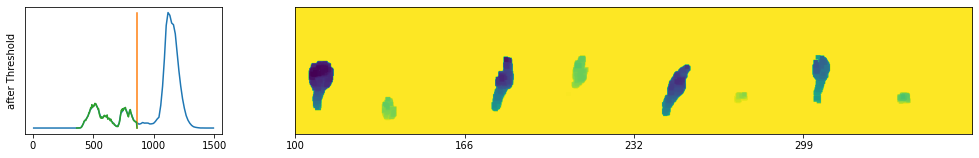

dataset/ds325/gestures_two_hands_swap


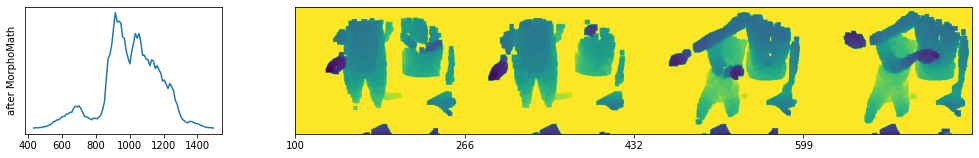

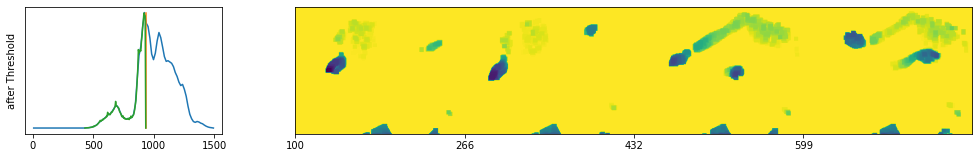

dataset/ds325/sequence_closed_hand


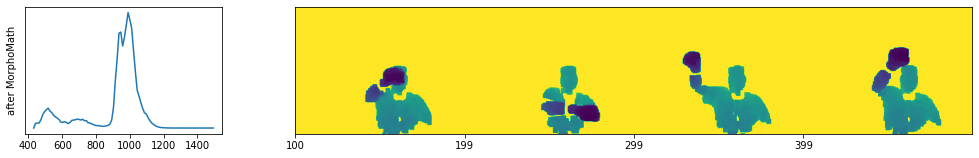

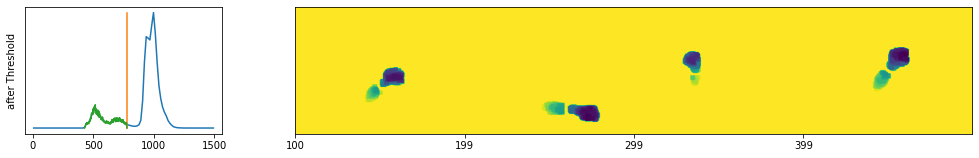

dataset/ds325/sequence_open_hand


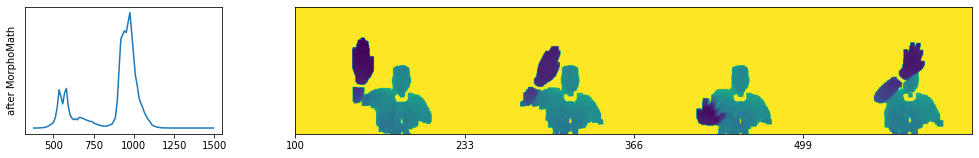

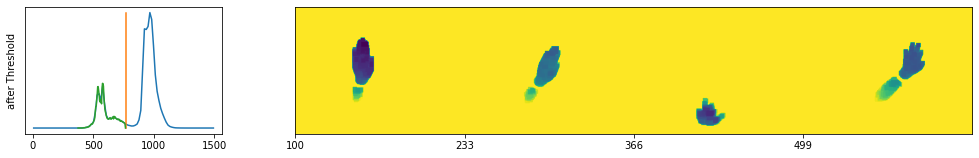

dataset/ds325/sequence_small_shapes


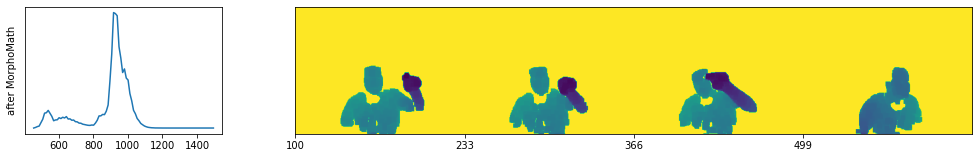

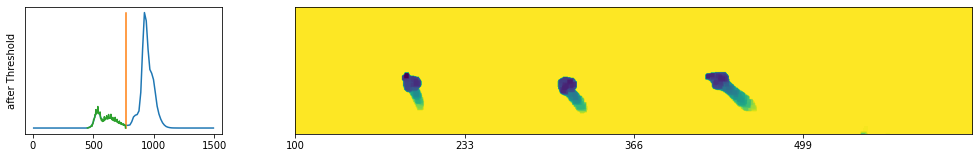

dataset/ds536/circle_ccw


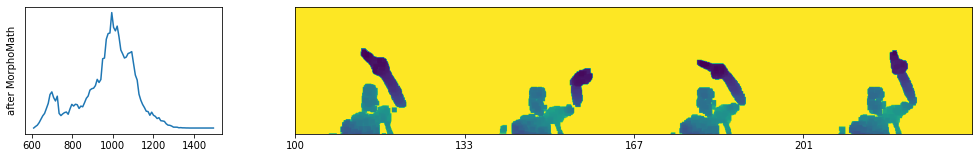

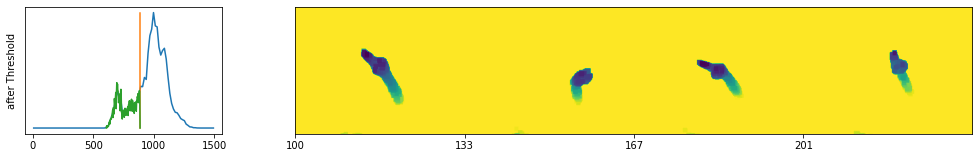

dataset/ds536/circle_ccw_far


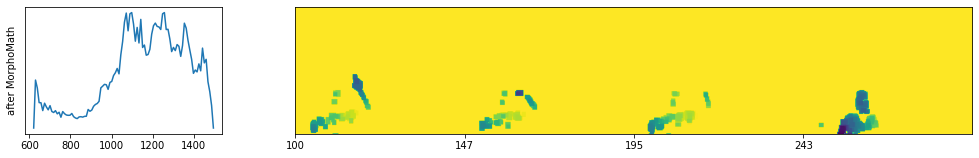

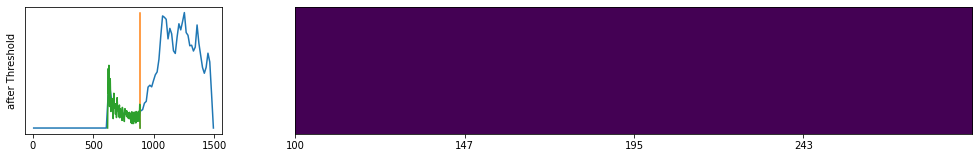

dataset/ds536/circle_ccw_hand


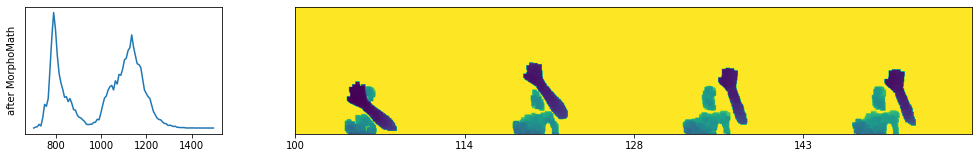

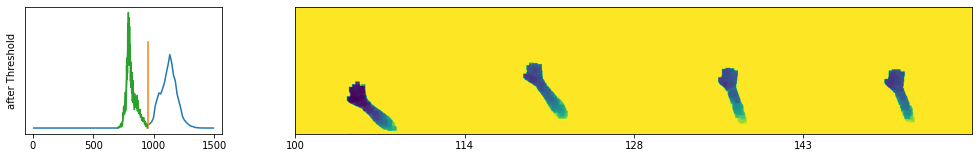

dataset/ds536/circle_sequence


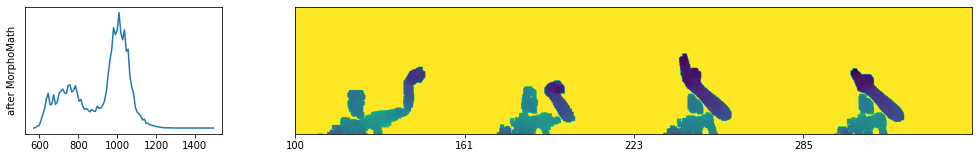

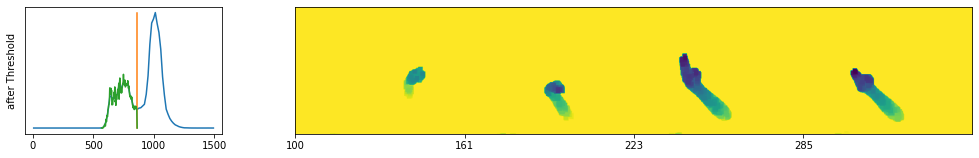

dataset/ds536/multiple_shapes_1


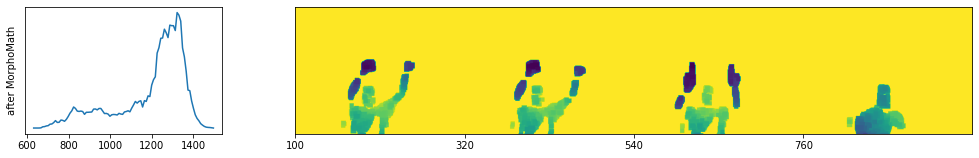

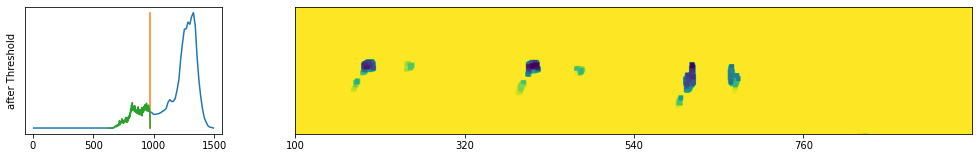

dataset/ds536/rectangle_ccw


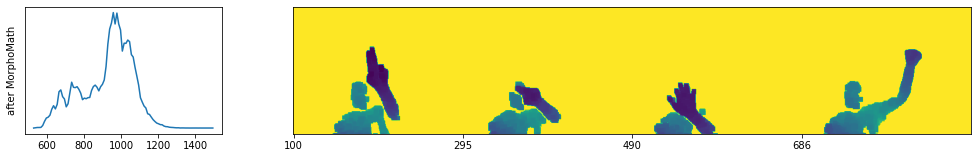

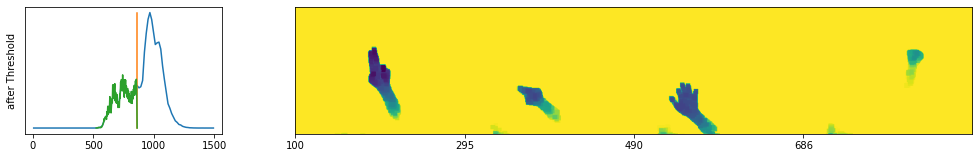

dataset/ds536/rectangle_cw


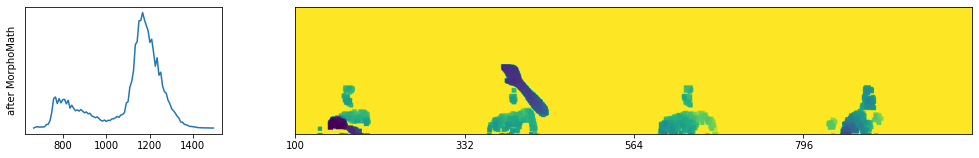

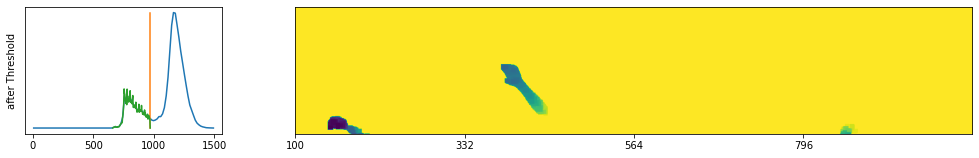

dataset/ds536/star


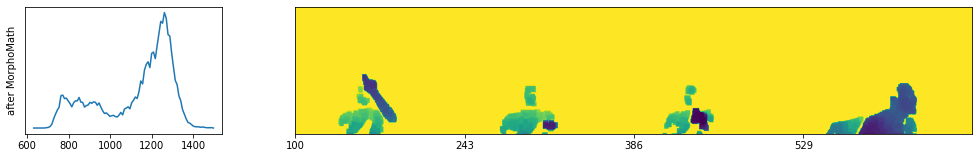

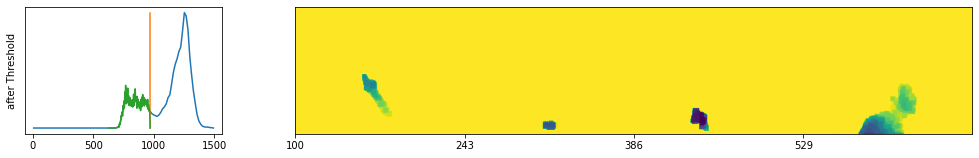

dataset/ds536/zigzag


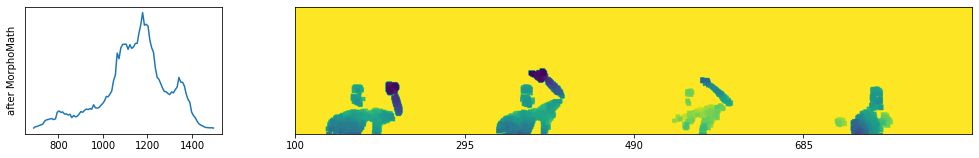

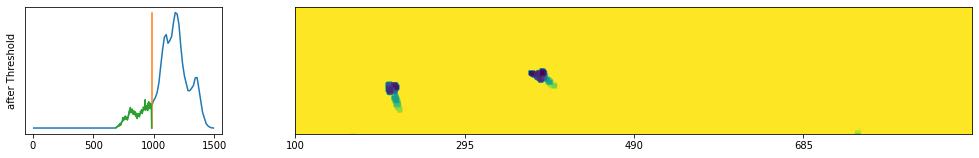

In [39]:
for folder in filter(lambda x: '.txt' not in x, tqdm(sorted(glob.glob("dataset/*/*")))):
    print(folder)
    detector(folder)

In [ ]:
from d1_unistroke_recognizer.dollar import Dollar